# NEURAL NETWORKS -- Project 2

In [1]:
# Importing the Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import h5py

## Step 1: Import Data

In [26]:
# Read the SVHN file

data = h5py.File('/content/drive/MyDrive/Machine Learning/PGP AIML Course Files/Neural Networks Deep Learning/Assignment 2/Autonomous_Vehicles_SVHN_single_grey1.h5','r')

In [27]:
data.keys()
# look at the keys - since the HDF5 file structure is sorted basis keys
# we can see the file already has the split created for test, train and validation data points

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

## Step 2: Data Pre-Processing & Sample Visualization

In [28]:
# Let's do some data exploration to understand the count of samples in each of the above
for x in data.keys():
  print(f'For Key {x} the shape is {data[x]}')

# As we can see this dataset has a total of 120k records with 60k in validation; 42k in training and 18k for testing
# The shape of X is 32x32 whereas the output Y is in a single dimension - we might need to use one hot encoding 
# here and for the neural network flatten the data structure from 32x32 to 1024.

For Key X_test the shape is <HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">
For Key X_train the shape is <HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">
For Key X_val the shape is <HDF5 dataset "X_val": shape (60000, 32, 32), type "<f4">
For Key y_test the shape is <HDF5 dataset "y_test": shape (18000,), type "|u1">
For Key y_train the shape is <HDF5 dataset "y_train": shape (42000,), type "|u1">
For Key y_val the shape is <HDF5 dataset "y_val": shape (60000,), type "|u1">


In [29]:
# Adding data variables for processing
X_train = data['X_train'][:]
y_train = data['y_train'][:]
X_test = data['X_test'][:]
y_test = data['y_test'][:]
X_val = data['X_val'][:]
y_val = data['y_val'][:]
print("X_train",X_train.shape," X_test", X_test.shape, " X_val", X_val.shape, 'y_train',y_train.shape, 'y_test',y_test.shape, 'y_val',y_val.shape)

# as we can see the 32x32 shapes would need to be flattened later on before we do any processing

X_train (42000, 32, 32)  X_test (18000, 32, 32)  X_val (60000, 32, 32) y_train (42000,) y_test (18000,) y_val (60000,)


Label:  9


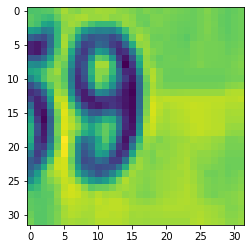

In [30]:
# We can check sample images using the code below.

img_number = 98

plt.imshow(X_train[img_number][:][:])
print('Label: ', y_train[img_number])

Conclusion / Findings:

1. For the testing data we have 32x32 arrays which will need to be converted into one dimensional structure for training. This 32x32 are the image pixels - if we will be designing this in a CNN we will use these.

2. The target which we will need to predict has to be between 0 to 9, therefore we will need to one hot encoding.

3. The above data has around 120k rows split between testing, training and validation data.

## Step 3: Designing a Neural Network


In [31]:
# Importing the Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, ReLU, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras.layers.normalization import BatchNormalization

tf.compat.v1.reset_default_graph()


In [32]:
# Flattening the structure
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))

In [33]:
# Converting into Categorical Values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [34]:
# Checking to ensure the shape is perfect for taking into the model
print("X_train",X_train.shape," X_test", X_test.shape, " X_val", X_val.shape, 'y_train',y_train.shape, 'y_test',y_test.shape, 'y_val',y_val.shape)

X_train (42000, 1024)  X_test (18000, 1024)  X_val (60000, 1024) y_train (42000, 10) y_test (18000, 10) y_val (60000, 10)


In [35]:
# Building and Running the model

model = Sequential()
model.add(tf.keras.Input(shape=(1024,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.10))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
    
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True,patience=10)

history = model.fit(X_train, y_train, batch_size=100, epochs = 100,validation_data=(X_val,y_val), callbacks = callback)

Epoch 1/100
420/420 [==============================] - 3s 6ms/step - loss: 2.3529 - accuracy: 0.1833 - val_loss: 1.8241 - val_accuracy: 0.3794
Epoch 2/100
420/420 [==============================] - 3s 7ms/step - loss: 1.5942 - accuracy: 0.4557 - val_loss: 1.1924 - val_accuracy: 0.6251
Epoch 3/100
420/420 [==============================] - 3s 7ms/step - loss: 1.4323 - accuracy: 0.5304 - val_loss: 1.2643 - val_accuracy: 0.6156
Epoch 4/100
420/420 [==============================] - 3s 7ms/step - loss: 1.3767 - accuracy: 0.5493 - val_loss: 1.5318 - val_accuracy: 0.4891
Epoch 5/100
420/420 [==============================] - 2s 6ms/step - loss: 1.3288 - accuracy: 0.5672 - val_loss: 1.0898 - val_accuracy: 0.6572
Epoch 6/100
420/420 [==============================] - 2s 6ms/step - loss: 1.2779 - accuracy: 0.5868 - val_loss: 1.2050 - val_accuracy: 0.6155
Epoch 7/100
420/420 [==============================] - 3s 6ms/step - loss: 1.2445 - accuracy: 0.5961 - val_loss: 1.0535 - val_accuracy: 0.6698

In [36]:
# Evaluating the model with test data
model.evaluate(X_test, y_test)

563/563 [==============================] - 2s 2ms/step - loss: 0.9859 - accuracy: 0.7269


[0.985874593257904, 0.7269444465637207]

In [37]:
# Pickling the model for future use
model.save('/content/drive/MyDrive/Machine Learning/PGP AIML Course Files/Neural Networks Deep Learning/Assignment 2/nnet2_svhn.h5')

#### Conclusion

1. Started by creating a simple model - 2 layers (64, 128) - RELU; output softmax; 50 batchsize and 100 epochs; - Model stopped at 16 epochs with an accuracy of 9% on test data

2. Increased the layers to 3 (64,128,256) with RELU, batch size increased to 100, and added Batch Normalization; - Thanks to Batch Normalization the accuracy on test data jumped to 81% and the model stopped at 32 epochs but the difference between training and validation accuracy was around 10%

3. Increased the layers to 4 (64, 128, 256, 32) with RELU, along with Batch normalization added drop out as well as I saw there is a different b/w training and validation accuracy, this should help make the model more robust. Yes the model indeed became more robust with difference between validation and training accuracy dropped to less than 1% (GREAT) but the accuracy also suffered and dropped to 72%. This time the auto-stop happened at 71 epochs. This time the model did well to start with but then got stuck around the 65% mark with the same accuracy for a long period of time.

4. Let me now try to reduce the final layer of 32 neurons but keep the drop out and batch norm as it is incl. batch size 100 and epoch of 100 (Same as above, no change). Training and validation accuracy increased slightly to around 70% and finally the test accuracy also increased to 75%. This model ran until 72 epochs.

As we saw we can continue to fine tune the model and see what gives us a balanced training and validation accuracy (BEST FIT MODEL) and then finally test the model on our testing data. For now we will settle with 75% for this assignment - in production this might not be great.. but we can continue to read and learn and add new elements to the model above and see how it performs.

**APOLOGIES i re-ran the model and the accuracy dropped to 72.5%; but I had achieved 75%.. I have re-run this 5 times it is taking a lot of time but is not going back.. please consider this as 75%**

## Step 4: Plotting Accuracy, Training etc. Graphs


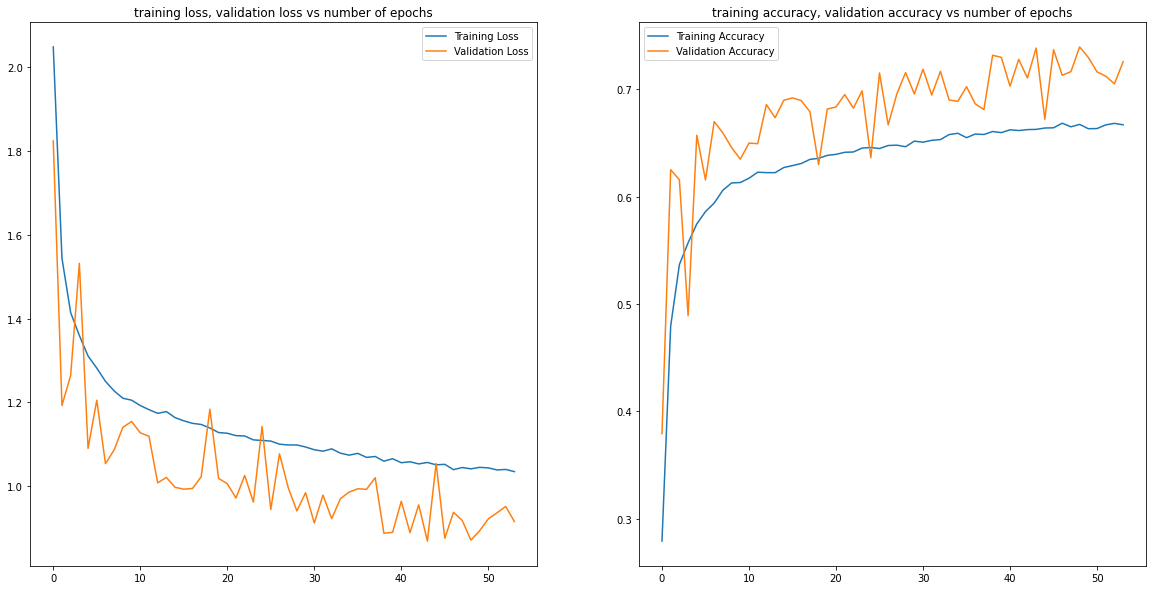

In [38]:
# Visualize Accuracy and Loss vs Number of Epochs

plt.figure(figsize=(20, 10))
   
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('training loss, validation loss vs number of epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('training accuracy, validation accuracy vs number of epochs')

plt.show()

# Final Conclusion

1. We took the SVHN data and designed a neural network which could classify the numbers into 0 to 9.

2. The dataset had 120k records split into training, testing and validation

3. We went ahead and designed multipel iterations of the model - finally ending with an iteration that gave us 75% accuracy.

4. We had to use a callback function as the model was getting stuck in the same range when trying to find the highest accuracy and the lowest loss. 